```
https://github.com/Irrationone/cellassign-paper/blob/5b466ad7f72fdf681a4754d2f4d85b5c9603bf15/pipelines/main/R/main_figures/proportion_validation_figure.R
https://bioconductor.org/packages/release/data/experiment/html/DuoClustering2018.html
```

In [ ]:
getwd()
setwd('..')
getwd()

In [2]:
#library(reticulate)

In [3]:
#load(file='datasets/data_download.ipynb.RData')

# Load libraries

In [12]:
library(DuoClustering2018)

using temporary cache /tmp/RtmpHtj1sm/BiocFileCache

snapshotDate(): 2020-10-27



In [4]:
library(SingleCellExperiment)
library(Seurat)
library(scran)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [5]:
library(data.table)
library(stringr)
library(Matrix)


Attaching package: 'data.table'


The following object is masked from 'package:SummarizedExperiment':

    shift


The following object is masked from 'package:GenomicRanges':

    shift


The following object is masked from 'package:IRanges':

    shift


The following objects are masked from 'package:S4Vectors':

    first, second



Attaching package: 'Matrix'


The following object is masked from 'package:S4Vectors':

    expand




In [6]:
library(scClustViz)

Loading required package: shiny



# Load datasets

In [13]:
sce_full_Koh <- sce_full_Koh(metadata = FALSE)
sce_full_Koh(metadata = TRUE)

snapshotDate(): 2020-10-27

see ?DuoClustering2018 and browseVignettes('DuoClustering2018') for documentation

downloading 1 resources

retrieving 1 resource

loading from cache

snapshotDate(): 2020-10-27



ExperimentHub with 1 record
# snapshotDate(): 2020-10-27
# names(): EH1500
# package(): DuoClustering2018
# $dataprovider: SRA (SRP073808), Koh et al. (2016)
# $species: Homo sapiens
# $rdataclass: SingleCellExperiment
# $rdatadateadded: 2018-08-02
# $title: sce_full_Koh
# $description: Gene counts for scRNA-seq data set of in vitro cultured H7 e...
# $taxonomyid: 9606
# $genome: GRCh38
# $sourcetype: FASTQ
# $sourceurl: https://www.ncbi.nlm.nih.gov/sra?term=SRP073808
# $sourcesize: NA
# $tags: c("SingleCellData", "SingleCell") 
# retrieve record with 'object[["EH1500"]]' 

In [14]:
koh_bulk_scrna_celltypes <- c("hESC", "APS", "MPS", "DLL1pPXM", "ESMT", "Sclrtm", "D5CntrlDrmmtm","D2LtM")
colData(sce_full_Koh)$phenoid=str_replace_all(colData(sce_full_Koh)$phenoid,pattern="^H7(_derived_|_dreived_)?", replacement="")
rownames(sce_full_Koh) <- str_replace_all(rownames(sce_full_Koh),pattern="\\..*",replacement="")

sce_full_Kohinbulk <- sce_full_Koh[,colData(sce_full_Koh)$phenoid%in%koh_bulk_scrna_celltypes]

In [31]:
a=counts(sce_full_Kohinbulk)
b=apply(a, c(1,2), function(n){rbinom(1,size=floor(n), prob=0.5)})
sce_full_Kohinbulk2 <- sce_full_Koh[,colData(sce_full_Koh)$phenoid%in%koh_bulk_scrna_celltypes]
counts(sce_full_Kohinbulk2)=b

In [57]:
a=counts(sce_full_Kohinbulk)
b=apply(a, c(1,2), function(n){rbinom(1,size=floor(n), prob=0.2)})
sce_full_Kohinbulk3 <- sce_full_Koh[,colData(sce_full_Koh)$phenoid%in%koh_bulk_scrna_celltypes]
counts(sce_full_Kohinbulk3)=b

In [58]:
a=counts(sce_full_Kohinbulk)
b=apply(a, c(1,2), function(n){rbinom(1,size=floor(n), prob=0.1)})
sce_full_Kohinbulk4 <- sce_full_Koh[,colData(sce_full_Koh)$phenoid%in%koh_bulk_scrna_celltypes]
counts(sce_full_Kohinbulk4)=b

In [13]:
sce_full_Zhengmix8eq <- sce_full_Zhengmix8eq(metadata = FALSE)
sce_full_Zhengmix8eq(metadata = TRUE)

snapshotDate(): 2020-10-27

see ?DuoClustering2018 and browseVignettes('DuoClustering2018') for documentation

downloading 1 resources

retrieving 1 resource

loading from cache

snapshotDate(): 2020-10-27



ExperimentHub with 1 record
# snapshotDate(): 2020-10-27
# names(): EH1532
# package(): DuoClustering2018
# $dataprovider: 10x Genomics, Zheng et al (2017)
# $species: Homo sapiens
# $rdataclass: SingleCellExperiment
# $rdatadateadded: 2018-08-02
# $title: sce_full_Zhengmix8eq
# $description: UMI counts for scRNA-seq data set consisting of sorted B-cel...
# $taxonomyid: 9606
# $genome: hg19
# $sourcetype: TXT
# $sourceurl: https://support.10xgenomics.com/single-cell-gene-expression/da...
# $sourcesize: NA
# $tags: c("SingleCellData", "SingleCell") 
# retrieve record with 'object[["EH1532"]]' 

In [1]:
library(scClustViz)

Loading required package: shiny



In [ ]:
system('cd datasets;git clone https://github.com/BaderLab/HumanLiver',intern=TRUE)

In [7]:
load("datasets/HumanLiver/inst/liver/HumanLiver.RData")

In [8]:
HumanLiverSeurat@meta.data$phenoid <- ClusterNames(sCVdL$res.0.8)[HumanLiverSeurat@meta.data$res.0.8]

In [9]:
sce_full_HumanLiver <- as.SingleCellExperiment(HumanLiverSeurat)

In [49]:
median(as.matrix(counts(sce_full_HumanLiver)))b

[1] 0

In [56]:
mean(as.matrix(counts(sce_full_HumanLiver)))

[1] 0.2612425

In [54]:
quantile(as.matrix(counts(sce_full_Kohinbulk)), probs = seq(0, 1, 0.25))

0%          25%          50%          75%         100% 
0.000000e+00 0.000000e+00 0.000000e+00 9.248656e-01 2.363845e+05

In [55]:
mean(as.matrix(counts(sce_full_Kohinbulk)))

[1] 32.84931

In [52]:
help(quantile)

# munge datasets

In [33]:
filter_exp <-function(sce,pct){
    expsn <- rowMeans(logcounts(sce))
    keep <- order(expsn, decreasing = TRUE)[seq_len(pct/100*length(expsn))]
    sce_filtered <- sce[keep, ]
    
    sce_filtered
}

In [42]:
sce_full_Kohinbulk_expfiltered <- filter_exp(sce_full_Kohinbulk,30)
sce_full_HumanLiver_expfiltered <- filter_exp(sce_full_HumanLiver,30)
sce_full_Zhengmix8eq_expfiltered <- filter_exp(sce_full_Zhengmix8eq,30)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'rowMeans': unable to find an inherited method for function 'logcounts' for signature '"function"'


In [34]:
sce_full_Kohinbulk2_expfiltered <- filter_exp(sce_full_Kohinbulk2,30)

In [59]:
sce_full_Kohinbulk3_expfiltered <- filter_exp(sce_full_Kohinbulk3,30)

In [60]:
sce_full_Kohinbulk4_expfiltered <- filter_exp(sce_full_Kohinbulk4,30)

In [35]:
save_sce <- function(sce,path,lowdim='TSNE'){
    
    sizeFactors(sce) <- calculateSumFactors(sce)
    
    save_data <- Matrix(as.matrix(assay(sce,'counts')),sparse=TRUE)
    
    writeMM(save_data,sprintf("%s.data.counts.mm",path))
    write.table(as.matrix(rownames(save_data)),sprintf('%s.data.row',path),row.names=FALSE, col.names=FALSE)
    write.table(as.matrix(colnames(save_data)),sprintf('%s.data.col',path),row.names=FALSE, col.names=FALSE)
    
    tsne_data <- reducedDim(sce, lowdim)
    colnames(tsne_data) <- c(sprintf('%s_1',lowdim),sprintf('%s_2',lowdim))
    print(head(cbind(as.matrix(colData(sce)),tsne_data)))
    write.table(cbind(as.matrix(colData(sce)),tsne_data),sprintf('%s.metadatacol.tsv',path),row.names=TRUE, col.names=TRUE,sep='\t')    
    rowData(sce)$save=TRUE
    write.table(cbind(as.matrix(rowData(sce))),sprintf('%s.metadatarow.tsv',path),row.names=TRUE, col.names=TRUE,sep='\t')    
    
    write.table(sizeFactors(sce),file=sprintf('%s.size_factor.tsv',path),sep='\t',row.names=FALSE, col.names=FALSE)    
    
}

In [25]:
save_sce(sce_full_Kohinbulk_expfiltered,'datasets/extract/Kohinbulk_filtered')
save_sce(sce_full_HumanLiver_expfiltered,'datasets/extract/HumanLiver_filtered')
save_sce(sce_full_Zhengmix8eq_expfiltered,'datasets/extract/Zhengmix8eq_filtered')

           Run          LibraryName phenoid total_features log10_total_features
SRR3952323 "SRR3952323" "H7hESC"    "hESC"  "18063"        "4.25681392458089"  
SRR3952325 "SRR3952325" "H7hESC"    "hESC"  "15969"        "4.20330491613848"  
SRR3952326 "SRR3952326" "H7hESC"    "hESC"  "15608"        "4.1933750806157"   
SRR3952327 "SRR3952327" "H7hESC"    "hESC"  "16850"        "4.2266256785958"   
SRR3952328 "SRR3952328" "H7hESC"    "hESC"  "16071"        "4.20606992374019"  
SRR3952329 "SRR3952329" "H7hESC"    "hESC"  "18717"        "4.27225944294022"  
           total_counts       log10_total_counts pct_counts_top_50_features
SRR3952323 "2649550.94874739" "6.42317243897892" "15.5115459121883"        
SRR3952325 "2636989.96716251" "6.42110864214907" "21.2539851371196"        
SRR3952326 "690353.971077556" "5.83907245644658" "19.2531536756056"        
SRR3952327 "3697962.94143827" "6.56796267207174" "18.0111853706884"        
SRR3952328 "2573666.86551366" "6.41055250003469" "18.1176281

In [61]:
save_sce(sce_full_Kohinbulk3_expfiltered,'datasets/extract/Kohinbulk3_filtered')

           Run          LibraryName phenoid total_features log10_total_features
SRR3952323 "SRR3952323" "H7hESC"    "hESC"  "18063"        "4.25681392458089"  
SRR3952325 "SRR3952325" "H7hESC"    "hESC"  "15969"        "4.20330491613848"  
SRR3952326 "SRR3952326" "H7hESC"    "hESC"  "15608"        "4.1933750806157"   
SRR3952327 "SRR3952327" "H7hESC"    "hESC"  "16850"        "4.2266256785958"   
SRR3952328 "SRR3952328" "H7hESC"    "hESC"  "16071"        "4.20606992374019"  
SRR3952329 "SRR3952329" "H7hESC"    "hESC"  "18717"        "4.27225944294022"  
           total_counts       log10_total_counts pct_counts_top_50_features
SRR3952323 "2649550.94874739" "6.42317243897892" "15.5115459121883"        
SRR3952325 "2636989.96716251" "6.42110864214907" "21.2539851371196"        
SRR3952326 "690353.971077556" "5.83907245644658" "19.2531536756056"        
SRR3952327 "3697962.94143827" "6.56796267207174" "18.0111853706884"        
SRR3952328 "2573666.86551366" "6.41055250003469" "18.1176281

In [62]:
save_sce(sce_full_Kohinbulk4_expfiltered,'datasets/extract/Kohinbulk4_filtered')

           Run          LibraryName phenoid total_features log10_total_features
SRR3952323 "SRR3952323" "H7hESC"    "hESC"  "18063"        "4.25681392458089"  
SRR3952325 "SRR3952325" "H7hESC"    "hESC"  "15969"        "4.20330491613848"  
SRR3952326 "SRR3952326" "H7hESC"    "hESC"  "15608"        "4.1933750806157"   
SRR3952327 "SRR3952327" "H7hESC"    "hESC"  "16850"        "4.2266256785958"   
SRR3952328 "SRR3952328" "H7hESC"    "hESC"  "16071"        "4.20606992374019"  
SRR3952329 "SRR3952329" "H7hESC"    "hESC"  "18717"        "4.27225944294022"  
           total_counts       log10_total_counts pct_counts_top_50_features
SRR3952323 "2649550.94874739" "6.42317243897892" "15.5115459121883"        
SRR3952325 "2636989.96716251" "6.42110864214907" "21.2539851371196"        
SRR3952326 "690353.971077556" "5.83907245644658" "19.2531536756056"        
SRR3952327 "3697962.94143827" "6.56796267207174" "18.0111853706884"        
SRR3952328 "2573666.86551366" "6.41055250003469" "18.1176281

In [38]:
save_hvg_seurat <-function(sce,path,method){
    seurat <- CreateSeuratObject(counts = counts(sce), project = "scRNAseq", assay = "RNA",
                                         min.cells = 0, min.features = 0,
                                         meta.data = as.data.frame(colData(sce)))
    #seurat <- ScaleData(seurat, vars.to.regress = "nUMI", display.progress = FALSE)
    seurat <- NormalizeData(seurat)
    seurat <- FindVariableFeatures(seurat, selection.method = method, nfeatures = length(rownames(seurat@assays$RNA)))
    vf <- VariableFeatures(seurat)  
    write.table(vf,file=sprintf('%s.hvg.%s.tsv',path,method),sep='\t',row.names=FALSE, col.names=TRUE)       
}

In [27]:
for(method in c('vst','mvp','disp')){
    save_hvg_seurat(sce_full_Kohinbulk_expfiltered,'datasets/extract/Kohinbulk_filtered',method)
    save_hvg_seurat(sce_full_HumanLiver_expfiltered,'datasets/extract/HumanLiver_filtered',method)
    save_hvg_seurat(sce_full_Zhengmix8eq_expfiltered,'datasets/extract/Zhengmix8eq_filtered',method)
}

In [39]:
for(method in c('vst','mvp','disp')){
    save_hvg_seurat(sce_full_Kohinbulk2_expfiltered,'datasets/extract/Kohinbulk2_filtered',method)
}

In [63]:
for(method in c('vst','mvp','disp')){
    save_hvg_seurat(sce_full_Kohinbulk3_expfiltered,'datasets/extract/Kohinbulk3_filtered',method)
}

In [64]:
for(method in c('vst','mvp','disp')){
    save_hvg_seurat(sce_full_Kohinbulk4_expfiltered,'datasets/extract/Kohinbulk4_filtered',method)
}

In [28]:
#reducedDim(sce_full_Koh,'PCA')
#reducedDim(runPCA(sce_full_Koh),'PCA')

In [29]:
#write.table(Embeddings(toview[['tsne']]),
#        file=sprintf('datasets/extract/%s.tsne.MarcoPolodisp.2000.tsv','Zhengmix8eq'),
#        sep='\t',
#        row.names=TRUE, 
#        col.names=TRUE) 

In [88]:
koh_seurat=as.Seurat(sce_full_Koh)

In [147]:
#sce_new=scater::runPCA(sce_full_Koh)
#reducedDim(runPCA(sce_full_Koh),'PCA')
#sce_new=scater::runTSNE(sce_full_Koh,reddim='PCA')
#plotTSNE(sce_new)
#koh_seurat=as.Seurat(sce_full_Kohl)
#koh_seurat <- FindNeighbors(koh_seurat,reduction='PCA',dims = 1:5)
#koh_seurat <- FindClusters(koh_seurat, resolution = 1)

In [183]:
seurat=as.Seurat(sce_full_Kohinbulk_expfiltered)

seurat_hvg <- NormalizeData(seurat)

all.genes <- rownames(seurat_hvg)
seurat_hvg=ScaleData(seurat_hvg,features = all.genes)

Centering and scaling data matrix



In [193]:
seurat_hvg <- FindVariableFeatures(seurat_hvg, selection.method = "vst", nfeatures = 2000)

In [194]:
seurat_hvg_pca <- RunPCA(seurat_hvg, features = VariableFeatures(object = seurat_hvg))

PC_ 1 
Positive:  ENSG00000138829, ENSG00000139219, ENSG00000115461, ENSG00000026025, ENSG00000185070, ENSG00000166450, ENSG00000168542, ENSG00000164692, ENSG00000165029, ENSG00000162944 
	   ENSG00000185920, ENSG00000138061, ENSG00000132669, ENSG00000169122, ENSG00000277443, ENSG00000164161, ENSG00000112902, ENSG00000184349, ENSG00000170961, ENSG00000152785 
	   ENSG00000139263, ENSG00000149212, ENSG00000115414, ENSG00000114861, ENSG00000140937, ENSG00000092607, ENSG00000174136, ENSG00000101493, ENSG00000053438, ENSG00000088756 
Negative:  ENSG00000265992, ENSG00000154237, ENSG00000275216, ENSG00000240563, ENSG00000254277, ENSG00000241186, ENSG00000254339, ENSG00000128739, ENSG00000236673, ENSG00000121570 
	   ENSG00000185885, ENSG00000156966, ENSG00000169764, ENSG00000197462, ENSG00000254934, ENSG00000088305, ENSG00000272398, ENSG00000187193, ENSG00000249532, ENSG00000059804 
	   ENSG00000118785, ENSG00000164300, ENSG00000111669, ENSG00000147601, ENSG00000134333, ENSG00000102096, ENS

In [200]:
seurat_hvg_pca_label <- FindNeighbors(seurat_hvg_pca)#, dims = 1:10)
seurat_hvg_pca_label_cluster <- FindClusters(seurat_hvg_pca_label, resolution = 2)
seurat_hvg_pca_label_cluster_tsne <- RunTSNE(seurat_hvg_pca_label_cluster)#, dims= 1:10)    

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 446
Number of edges: 12644

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6986
Number of communities: 7
Elapsed time: 0 seconds


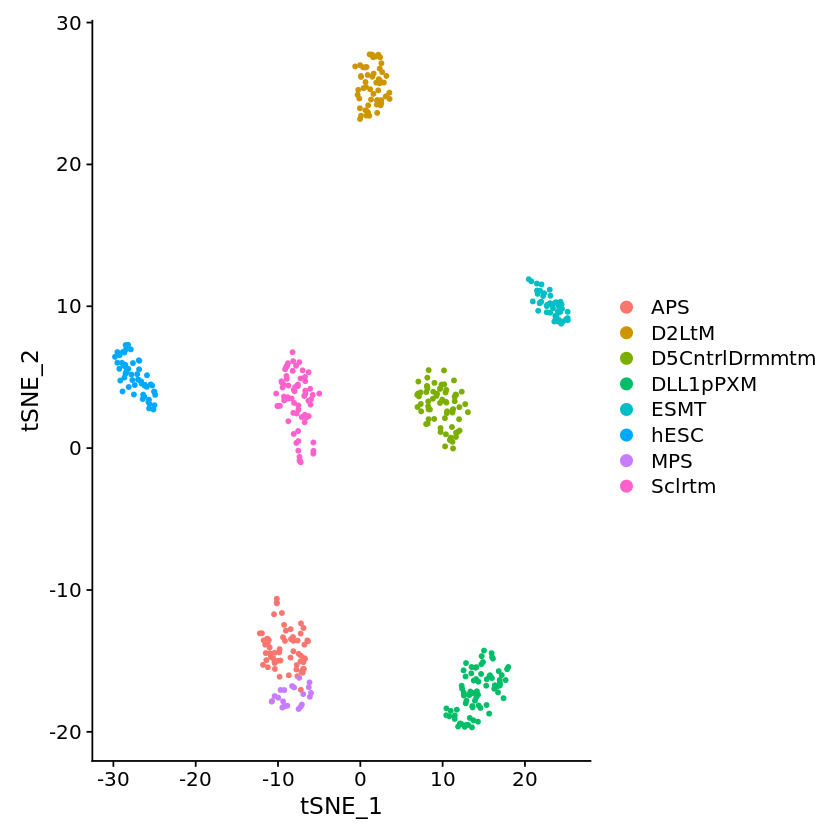

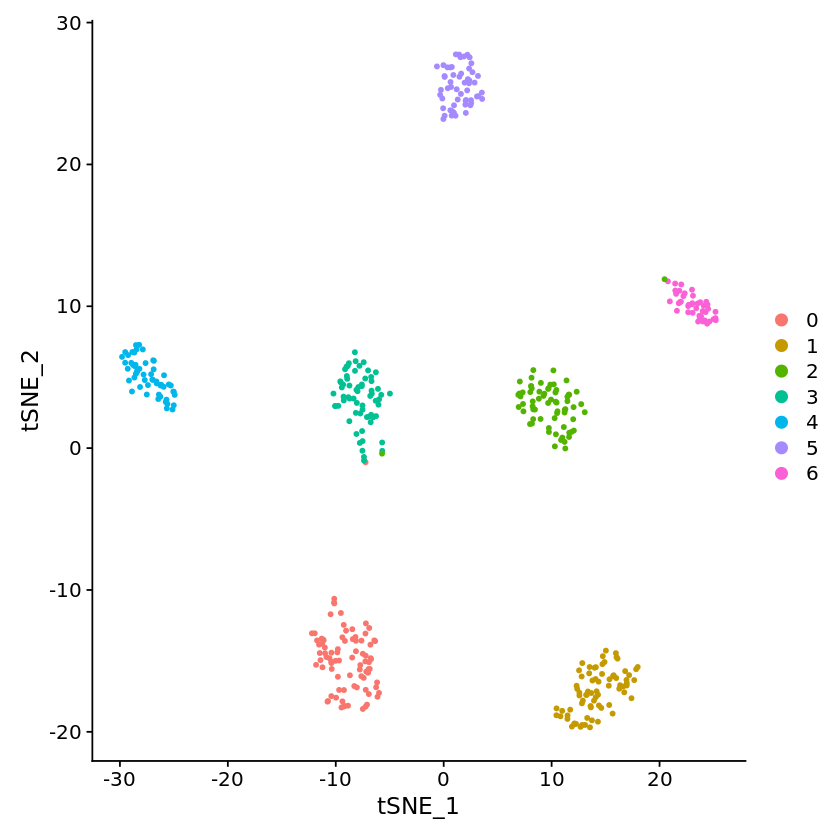

In [201]:
DimPlot(seurat_hvg_pca_label_cluster_tsne, group.by='phenoid', reduction = "tsne")   

DimPlot(seurat_hvg_pca_label_cluster_tsne, group.by='seurat_clusters', reduction = "tsne")   

In [197]:
write.table(Embeddings(seurat_hvg_pca_label_cluster_tsne[['tsne']]),
        file=sprintf('datasets/extract/%s.tsne.vst.2000.tsv','Kohinbulk_filtered'),
        sep='\t',
        row.names=TRUE, 
        col.names=TRUE) 

In [ ]:
runTNSE(koh_seurat)

In [120]:
koh_seurat

An object of class Seurat 
48981 features across 531 samples within 1 assay 
Active assay: RNA (48981 features, 0 variable features)
 2 dimensional reductions calculated: PCA, TSNE

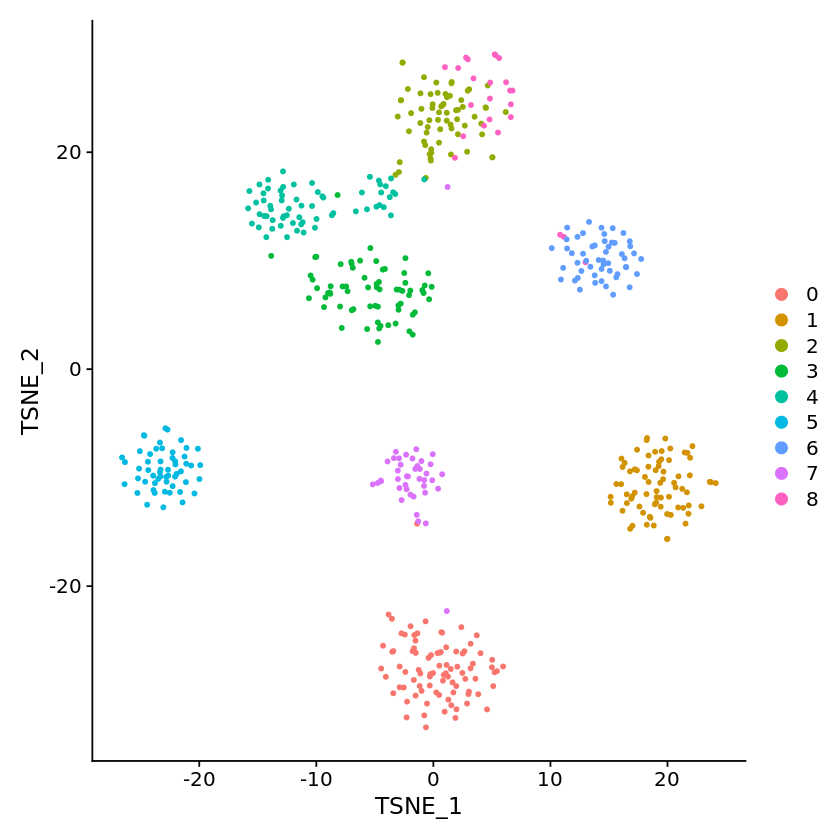

In [121]:
DimPlot(koh_seurat)

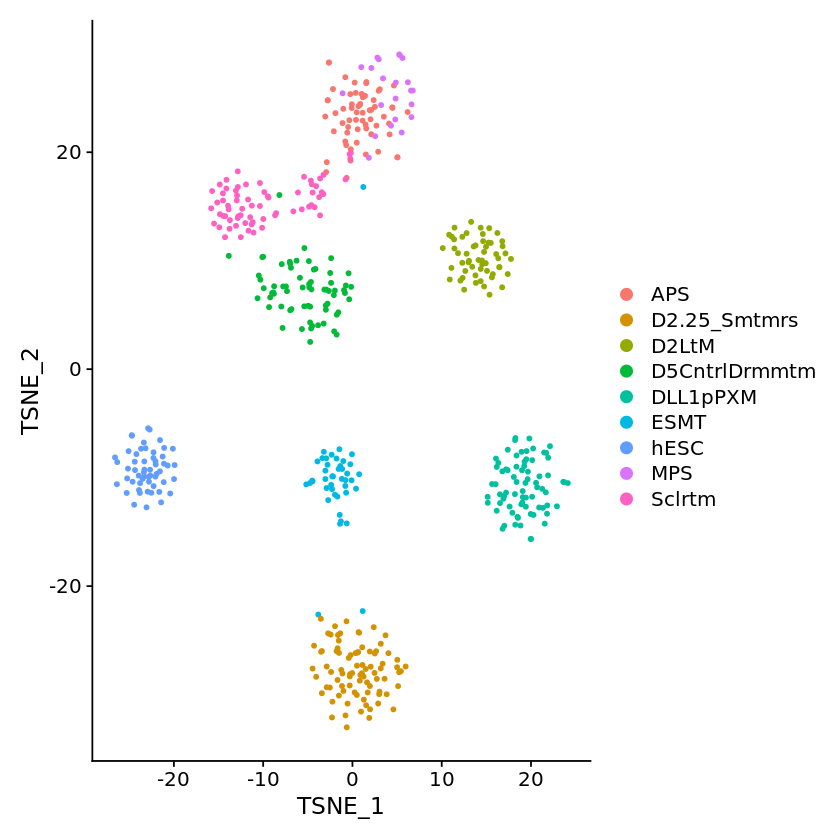

In [105]:
DimPlot(koh_seurat,group.by='phenoid')

In [99]:
help(FindNeighbors)

In [86]:
sce_new=runTSNE(sce_new,dimred='PCA')

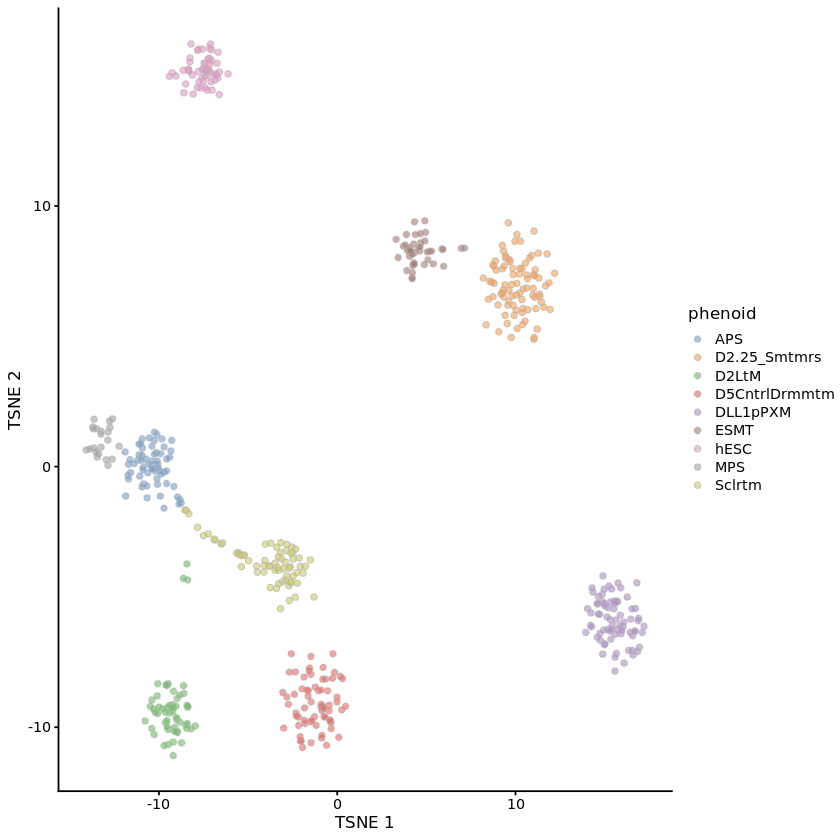

In [87]:
plotTSNE(sce_new,colour_by = "phenoid")

In [69]:
#help(runTSNE)

In [ ]:
sce_new

In [51]:
#a=runTSNE(sce_full_Koh)

a=runTSNE(sce_full_Koh,exprs_values = "logcounts", perplexity = 10)

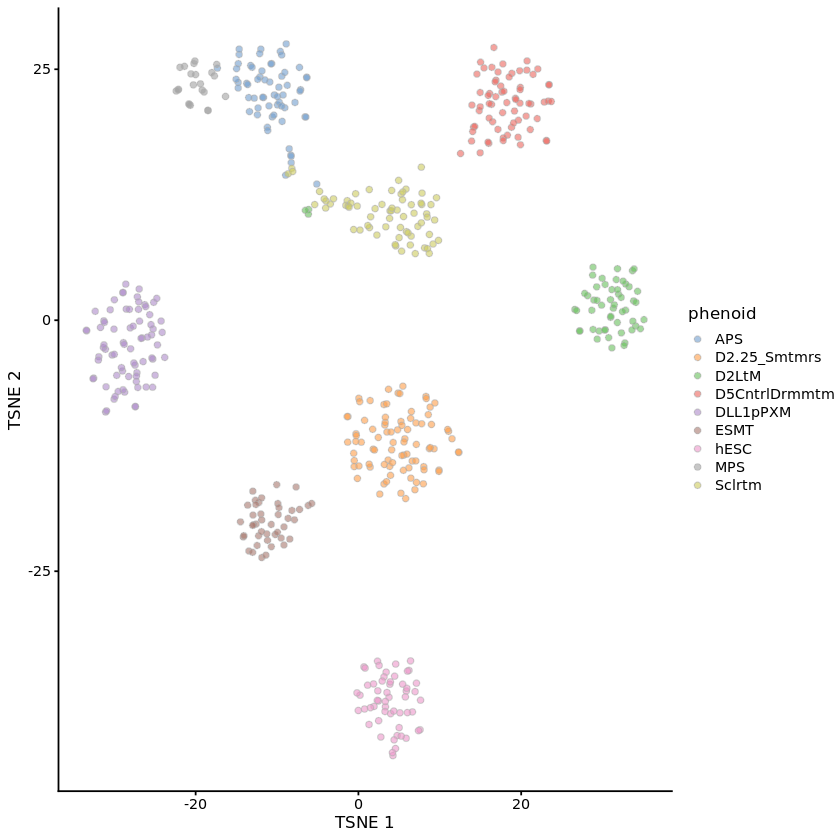

In [52]:
plotTSNE(a,colour_by = "phenoid")

In [44]:
help(plotTSNE)

In [24]:
koh_seurat

An object of class Seurat 
48981 features across 446 samples within 1 assay 
Active assay: RNA (48981 features, 0 variable features)
 2 dimensional reductions calculated: PCA, TSNE

In [35]:
sce=sce_full_Kohinbulk_expfiltered

In [36]:
    seurat <- CreateSeuratObject(counts = counts(sce), project = "scRNAseq", assay = "RNA",
                                         min.cells = 0, min.features = 0,
                                         meta.data = as.data.frame(colData(sce)))

In [37]:
seurat <- NormalizeData(seurat)

In [42]:
a=FindVariableFeatures(seurat, selection.method = 'disp', nfeatures = length(rownames(seurat@assays$RNA)))

In [43]:
length(VariableFeatures(a))  

[1] 14694

In [95]:
for(method in c('vst','mvp','disp')){
    save_hvg_seurat(sce_full_Simul_expfiltered,'Simul_filtered',method)
    save_hvg_seurat(sce_full_Simul2_expfiltered,'Simul2_filtered',method)
    save_hvg_seurat(sce_full_Simul3_expfiltered,'Simul3_filtered',method)
    save_hvg_seurat(sce_full_Simul4_expfiltered,'Simul4_filtered',method)
    save_hvg_seurat(sce_full_Simul5_expfiltered,'Simul5_filtered',method)
    save_hvg_seurat(sce_full_Simul6_expfiltered,'Simul6_filtered',method)
    save_hvg_seurat(sce_full_Simul7_expfiltered,'Simul7_filtered',method)
    save_hvg_seurat(sce_full_Simul8_expfiltered,'Simul8_filtered',method)
    save_hvg_seurat(sce_full_Simul9_expfiltered,'Simul9_filtered',method)
    save_hvg_seurat(sce_full_Simul9_expfiltered,'Simul10_filtered',method)
    save_hvg_seurat(sce_full_Simul9_expfiltered,'Simul11_filtered',method)
}

In [41]:
sce=sce_full_Simul_expfiltered

In [42]:
seurat <- CreateSeuratObject(counts = counts(sce), project = "scRNAseq", assay = "RNA",
                                     min.cells = 0, min.features = 0,
                                     meta.data = as.data.frame(colData(sce)))
#seurat <- ScaleData(seurat, vars.to.regress = "nUMI", display.progress = FALSE)
seurat <- NormalizeData(seurat)
seurat <- FindVariableFeatures(seurat, selection.method = method, nfeatures = length(rownames(seurat@assays$RNA)))
vf <- VariableFeatures(seurat) 

In [43]:
vf

[1] "4459" "3174" "3157" "838"  "3656" "2738" "555"  "4692" "4804" "2787"
  [11] "3723" "2664" "1026" "1627" "1295" "1453" "1319" "1392" "2941" "630" 
  [21] "1006" "592"  "682"  "3830" "2283" "607"  "3123" "1097" "4395" "2189"
  [31] "245"  "2378" "4481" "1983" "269"  "2697" "752"  "641"  "407"  "3412"
  [41] "2440" "1719" "2819" "3506" "2749" "2267" "2636" "549"  "4988" "848" 
  [51] "4794" "3164" "48"   "2535" "3548" "2129" "3793" "998"  "2915" "3156"
  [61] "2348" "390"  "4010" "2205" "4843" "1611" "3591" "4229" "1776" "2216"
  [71] "2187" "111"  "3151" "569"  "4350" "4777" "1306" "29"   "52"   "2317"
  [81] "4889" "2865" "3865" "931"  "3659" "221"  "401"  "1462" "4937" "2611"
  [91] "1772" "4887" "633"  "2642" "2388" "3150" "1763" "4368" "1613" "1436"
 [101] "1901" "778"  "4446" "3544" "4535" "4490" "1183" "889"  "879"  "287" 
 [111] "4418" "981"  "2080" "3143" "1102" "4559" "414"  "3242" "4996" "2830"
 [121] "971"  "3168" "2332" "3008" "576"  "3959" "3255" "2541" "2947" "1907"
 [131] "3529" "4719" "2150" "2571" "305"  "2229" "4537" "2981" "4194" "3316"
 [141] "4396" "442"  "2899" "2720" "781"  "44"   "3129" "2079" "4700" "685" 
 [151] "2527" "1065" "3668" "351"  "3607" "2619" "4022" "4146" "1419" "3418"
 [161] "1764" "4827" "933"  "317"  "1336" "680"  "1143" "2043" "3797" "4199"
 [171] "3329" "321"  "1053" "1037" "3468" "2450" "2180" "3566" "4390" "4267"
 [181] "2985" "3871" "4568" "3207" "4313" "812"  "2140" "2102" "1540" "3459"
 [191] "3126" "877"  "1068" "80"   "1233" "3514" "2258" "3437" "1351" "4062"
 [201] "1859" "2405" "4739" "1355" "1861" "3623" "3887" "861"  "4028" "1224"
 [211] "4128" "3003" "1643" "4524" "294"  "249"  "4922" "1870" "4506" "187" 
 [221] "3982" "2310" "1518" "2814" "3144" "658"  "3813" "2269" "2654" "3062"
 [231] "166"  "1385" "955"  "4412" "4960" "1389" "2168" "3342" "3788" "3344"
 [241] "1228" "1213" "3426" "2072" "2485" "4797" "3343" "4790" "4863" "4687"
 [251] "1784" "1020" "2668" "2199" "3543" "606"  "3227" "4114" "2009" "4928"
 [261] "4984" "1996" "3350" "2529" "3893" "2292" "866"  "1508" "2134" "1391"
 [271] "2002" "1353" "2731" "3237" "2923" "1569" "3939" "25"   "4044" "422" 
 [281] "2027" "3148" "637"  "1079" "4169" "1276" "2666" "542"  "2463" "3007"
 [291] "938"  "1415" "2646" "3104" "404"  "3763" "4508" "2904" "1744" "1615"
 [301] "1950" "376"  "3034" "3388" "3435" "1126" "3458" "1559" "2360" "3089"
 [311] "4337" "2769" "734"  "1312" "3688" "3706" "2625" "1109" "4949" "1980"
 [321] "2763" "1123" "2333" "3262" "3322" "2707" "4570" "1957" "1446" "1683"
 [331] "624"  "2629" "1162" "1897" "4472" "3270" "2537" "1412" "4111" "3886"
 [341] "1434" "2498" "3748" "2125" "2095" "4606" "2724" "1463" "152"  "3892"
 [351] "3420" "4444" "4671" "2905" "3953" "1985" "1648" "3819" "349"  "2196"
 [361] "605"  "2144" "3066" "709"  "2341" "2376" "4896" "10"   "2431" "4475"
 [371] "2391" "3615" "1984" "1004" "4884" "3701" "1072" "37"   "4488" "4097"
 [381] "711"  "2519" "1363" "4792" "2751" "3834" "3775" "1242" "3735" "292" 
 [391] "3447" "3298" "1495" "784"  "1570" "1031" "705"  "1110" "1289" "3404"
 [401] "1005" "3023" "4039" "4541" "2848" "3715" "3044" "4677" "4831" "620" 
 [411] "4001" "1829" "1504" "2914" "2265" "316"  "180"  "4920" "2862" "2452"
 [421] "2084" "75"   "2145" "1530" "1482" "32"   "2185" "33"   "2673" "1759"
 [431] "4106" "2708" "4758" "1878" "2190" "320"  "2064" "60"   "1142" "1025"
 [441] "653"  "796"  "3586" "2764" "1890" "2186" "2574" "4926" "3249" "3879"
 [451] "3666" "2103" "1774" "4245" "4004" "1850" "1027" "4167" "1266" "2715"
 [461] "582"  "2790" "962"  "3592" "1827" "3210" "2681" "2532" "1995" "201" 
 [471] "4678" "2778" "3643" "916"  "3575" "1524" "3317" "583"  "2857" "2912"
 [481] "3989" "228"  "4450" "3530" "2902" "3624" "4413" "3972" "3955" "2951"
 [491] "2750" "4387" "439"  "1664" "1252" "2777" "696"  "1659" "1891" "4269"
 [501] "1713" "396"  "2108" "3619" "1666" "1347" "244"  "2031" "2812" "2183"
 [511] "347"  "1739" "2471" "1749" "2683" "4319" "419"  "997"  "4716" "3777"

In [34]:
save_deg<-function(sce,save_name,method){
    
    seurat_object <- CreateSeuratObject(counts = counts(sce), project = "scRNAseq", assay = "RNA",
                                         min.cells = 0, min.features = 0,
                                         meta.data = as.data.frame(colData(sce)))
    
    Idents(seurat_object)=colData(sce)$phenoid
    
    marker_found=FindAllMarkers(seurat_object, test.use=method, logfc.threshold = 0.25, min.pct = 0.1)
    
    write.table(marker_found,file=sprintf('datasets/extract/%s.deg.%s.tsv',save_name,method),sep='\t')
}

In [44]:
for(method in c('wilcox','bimod','roc','t','negbinom','poisson','LR')){
    
    save_deg(sce_full_Zhengmix8eqZoomin_expfiltered,'Zhengmix8eqZoomin_filtered',method) 
}

Calculating cluster naive.cytotoxic

Calculating cluster regulatory.t

Calculating cluster cd4.t.helper

Calculating cluster memory.t

Calculating cluster naive.t

Calculating cluster naive.cytotoxic

Calculating cluster regulatory.t

Calculating cluster cd4.t.helper

Calculating cluster memory.t

Calculating cluster naive.t

Calculating cluster naive.cytotoxic

Calculating cluster regulatory.t

Calculating cluster cd4.t.helper

Calculating cluster memory.t

Calculating cluster naive.t

Calculating cluster naive.cytotoxic

Calculating cluster regulatory.t

Calculating cluster cd4.t.helper

Calculating cluster memory.t

Calculating cluster naive.t

Calculating cluster naive.cytotoxic

Calculating cluster regulatory.t

Calculating cluster cd4.t.helper

Calculating cluster memory.t

Calculating cluster naive.t

Calculating cluster naive.cytotoxic

Calculating cluster regulatory.t

Calculating cluster cd4.t.helper

Calculating cluster memory.t

Calculating cluster naive.t

Calculating clus